## 讀入CSV 檔

### 方法一

In [11]:
import pandas
orders = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab', sep = '\t', header=None)

In [12]:
orders.columns = ['Time','Action','User','Product','Quantity','Price']
orders.head()

,Time,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [13]:
orders['Time'] = pandas.to_datetime(orders['Time'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Time        54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


### 方法二

In [13]:
import pandas
orders_url = 'https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/purchase_order.tab'
m_cols = ['Time','Action','User','Product','Quantity','Price']
orders = pandas.read_csv(orders_url, sep = '\t', 
                         header=None, names = m_cols,
                         parse_dates={'Dates':[0]}, 
                         encoding = 'utf-8', 
                         dtype = {'Price':'object'})

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Dates       54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.5+ MB


In [15]:
?pandas.read_csv

## 讀入Excel 檔

In [2]:
import pandas
salary = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary2.xls')
salary.head()

WARNING *** file size (2662336) not 512 + multiple of sector size (512)


,時間(月),行業,受僱員工人數,每人每月薪資,經常性 薪資,非經常性薪資,加班費,平均 工時,正常 工時,加班 工時
NaN,97/1,工業及服務業,6621763,65740,36804,28936,1502,188.0,178.9,9.1
NaN,97/1,工業部門,3056248,65834,35249,30585,2512,193.5,177.9,15.6
NaN,97/1,服務業部門,3565515,65660,38138,27522,636,183.4,179.8,3.6
NaN,97/1,礦業及土石採取業,4817,75724,39973,35751,1062,190.6,185.6,5.0
NaN,97/1,製造業,2568373,67400,34621,32779,2774,195.2,177.7,17.5


In [3]:
salary['每人每月薪資'].max()

415055

In [4]:
salary.columns

Index(['時間(月)', '行業', '受僱員工人數', '每人每月薪資', '經常性\n薪資', '非經常性薪資', '加班費', '平均\n工時',
       '正常\n工時', '加班\n工時'],
      dtype='object')

In [5]:
salary.sort_values('經常性\n薪資', ascending=False).head(3)

,時間(月),行業,受僱員工人數,每人每月薪資,經常性 薪資,非經常性薪資,加班費,平均 工時,正常 工時,加班 工時
NaN,106/2,其他保險及退休基金輔助業,465,84937,84059,878,878,146.9,144.0,2.9
NaN,106/1,其他保險及退休基金輔助業,463,187783,84023,103760,1146,147.9,143.8,4.1
NaN,106/3,其他保險及退休基金輔助業,465,84644,83994,650,650,188.6,186.5,2.1


In [6]:
salary.groupby('行業')['經常性\n薪資'].mean().sort_values(ascending=False).head(3)

行業
其他保險及退休基金輔助業    77506.517241
電力供應業           69555.060345
海洋水運業           67587.112069
Name: 經常性\n薪資, dtype: float64

In [7]:
banking = salary[salary['行業'] == '銀行業'][['時間(月)','經常性\n薪資']]

In [8]:
banking.index = banking['時間(月)']

Populating the interactive namespace from numpy and matplotlib


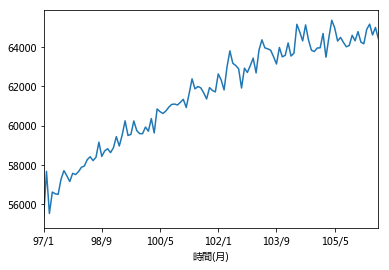

In [9]:
%pylab inline
banking['經常性\n薪資'].plot(kind = 'line')
pylab.savefig('banking.png')

## 如何讓圖片顯示中文
1. C:\ProgramData\Anaconda3\Lib\site-packages\matplotlib\mpl-data
2. 修改 matplotlibrc
3. 找到 #font.sans-serif (line 211)
4. 拿掉註解 #, 後面加入 Microsoft YaHei
5. 將 font.family 改成 sans-serif, 拿掉註解 (199)
6. Restart Kernel


## 檔案輸出

In [49]:
orders.to_csv('orders.csv')

In [53]:
banking.to_csv('banking.csv')

In [50]:
orders.to_csv('orders.tsv', sep = '\t')

In [54]:
orders.to_csv('orders.tsv', sep = '\t', chunksize=1000)

In [52]:
orders.to_excel('orders.xlsx')

In [56]:
orders.head().to_json()

'{"Dates":{"0":1435708801000,"1":1435708803000,"2":1435708819000,"3":1435708870000,"4":1435708896000},"Action":{"0":"order","1":"order","2":"order","3":"order","4":"order"},"User":{"0":"U312622727","1":"U239012343","2":"U10007697373","3":"U296328517","4":"U300884570"},"Product":{"0":"P0006944501","1":"P0006018073","2":"P0002267974","3":"P0016144236","4":"P0014516980122"},"Quantity":{"0":1,"1":1,"2":1,"3":1,"4":1},"Price":{"0":"1069","1":"1680","2":"285","3":"550","4":"249"}}'

In [57]:
orders.head().T.to_json()

'{"0":{"Dates":1435708801000,"Action":"order","User":"U312622727","Product":"P0006944501","Quantity":1,"Price":"1069"},"1":{"Dates":1435708803000,"Action":"order","User":"U239012343","Product":"P0006018073","Quantity":1,"Price":"1680"},"2":{"Dates":1435708819000,"Action":"order","User":"U10007697373","Product":"P0002267974","Quantity":1,"Price":"285"},"3":{"Dates":1435708870000,"Action":"order","User":"U296328517","Product":"P0016144236","Quantity":1,"Price":"550"},"4":{"Dates":1435708896000,"Action":"order","User":"U300884570","Product":"P0014516980122","Quantity":1,"Price":"249"}}'

In [59]:
orders.head().to_clipboard()

In [60]:
df1 = pandas.read_clipboard()
df1

,,Dates,Action,User,Product,Quantity,Price
0,2015-07-01,00:00:01,order,U312622727,P0006944501,1,1069
1,2015-07-01,00:00:03,order,U239012343,P0006018073,1,1680


In [70]:
product_list = pandas.read_clipboard(header=None)
product_items = product_list[0].tolist()

In [71]:
product_items

['P0012662252',
 'P0004401294',
 'P0000319874',
 'P0006944501',
 'P0003248055',
 'P0018924850',
 'P0013850723']

In [73]:
orders[orders['Product'].isin(product_items)].head()

,Dates,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069
6,2015-07-01 00:01:58,order,U465124055,P0012662252,1,488
7,2015-07-01 00:02:18,order,U403001364,P0004401294,1,276
8,2015-07-01 00:03:12,order,U465123247,P0000319874,1,2199
9,2015-07-01 00:03:45,order,U311808547,P0006944501,1,1069


## 讀取HTML


In [83]:
import requests
headers = {
    'user-agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
}
res = requests.get('https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=2330',verify=False, headers = headers)

C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [85]:
res.encoding='utf-8'
dfs = pandas.read_html(res.text)

In [86]:
type(dfs)

list

In [87]:
len(dfs)

18

In [98]:
dfs[16].head(3)

,年度,股本(億),財報評分,年度股價(元),獲利金額(億),獲利率(%),ROE(%),ROA(%),EPS(元),BPS(元),...,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0,Unnamed: 14_level_0,Unnamed: 15_level_0,Unnamed: 16_level_0,Unnamed: 17_level_0,Unnamed: 18_level_0,Unnamed: 19_level_0,Unnamed: 20_level_0
,收盤,平均,漲跌,漲跌(%),營業收入,營業毛利,營業利益,業外損益,稅後淨利,營業毛利,...,業外損益,稅後淨利,稅後EPS,成長(元),Unnamed: 15_level_1,Unnamed: 16_level_1,Unnamed: 17_level_1,Unnamed: 18_level_1,Unnamed: 19_level_1,Unnamed: 20_level_1
0,17Q2,2593,94,239.0,206.0,57.5,31.7,4478,2302,1786,...,1539,51.4,39.9,1.19,34.4,22.5(年估),15.9(年估),5.94,0.65,51.74
1,2016,2593,91,181.5,166.0,38.5,26.9,9479,4748,3780,...,3342,50.1,39.9,0.84,35.3,25.6,18.9,12.89,1.07,53.58
2,2015,2593,94,143.0,140.0,2.0,1.4,8435,4104,3200,...,3066,48.7,37.9,3.60,36.3,27,19.4,11.82,1.64,47.11


In [99]:
tw2330 = dfs[16]

In [100]:
tw2330.to_html('tw2330.html')

## 分組切割

In [16]:
?pandas.cut

In [26]:
import numpy


In [35]:
orders['date'] = pandas.to_datetime(orders['Time'].dt.date)

In [37]:
a = (orders['Time'] - orders['date'])

In [66]:
import math
orders['tiemgroup'] = numpy.ceil(a.dt.total_seconds() / 300) * 300 
#orders.date +  pandas.Timedelta(seconds=orders['tiemgroup'])
orders.head()

,Time,Action,User,Product,Quantity,Price,date,tiemgroup
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,2015-07-01,300.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,2015-07-01,300.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,2015-07-01,300.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,2015-07-01,300.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,2015-07-01,300.0


## 資料儲存

In [68]:
import sqlite3
con = sqlite3.connect('test.sqlite')
cur = con.cursor()
cur.execute('SELECT SQLITE_VERSION()')
data = cur.fetchone()
print(data)
con.close()

('3.14.2',)


In [70]:
import sqlite3 
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute('SELECT SQLITE_VERSION()')
    data = cur.fetchone()
    print(data)

('3.14.2',)


In [72]:
import sqlite3 
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','John Doe',53)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)")
    cur.execute("SELECT phone,address FROM PhoneAddress")
    data = cur.fetchall()
    print(data)
    

[('0912173381', 'United State'), ('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [1]:
import sqlite3 
with sqlite3.connect('test.sqlite') as con:
    cur = con.cursor()
    cur.execute("DROP TABLE IF EXISTS PhoneAddress")
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','John Doe',53)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)")
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)")
    cur.execute("SELECT phone,address FROM PhoneAddress")
    print('FETCHONE')
    data = cur.fetchone()
    print(data)
    
    
    print('FETCHALL')
    data = cur.fetchall()
    print(data)    

FETCHONE
('0912173381', 'United State')
FETCHALL
[('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [2]:
import pandas
employee=[{'name':'Mary','age':23,'gender':'F'},{'name':'John','age':33,'gender':'M'}]
df=pandas.DataFrame(employee)
df

,age,gender,name
0,23,F,Mary
1,33,M,John


In [3]:
with sqlite3.connect('test.sqlite') as db:
    df.to_sql(name='employee',index=False,con=db,if_exists='replace')

In [4]:
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col=0)

In [6]:
df.head(1)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.25081


In [7]:
def normalizePrice(ele):
    res=int(ele.replace('元/月','').replace(',',''))
    return res

df['price']=df['price'].map(normalizePrice)

In [9]:
df=df[['detail_url','search_date','title','address','floor_info','price','layout','building_area','building_use']]

In [12]:
df['btype']=df['building_use'].map(lambda e:str(e).split('/')[0])
df['buse']=df['building_use'].map(lambda e:str(e).split('/')[1] if len(str(e).split('/'))>1 else None)

In [13]:
df.head(1)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,btype,buse
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,6.0,透天厝/獨立套房,透天厝,獨立套房


In [14]:
import sqlite3 as lite
import pandas 
with lite.connect('house.sqlite') as db:
    df.to_sql('rent_591',con=db,if_exists='replace',index=None)

In [16]:
import sqlite3 as lite
import pandas 
with lite.connect('house.sqlite') as db:
    res = pandas.read_sql_query('select title, detail_url , price from rent_591 order by price desc limit 3', con = db)

res

,title,detail_url,price
0,樹林區俊英街,https://rent.591.com.tw/rent-detail-5133302.html,12750000
1,★彈性坪數、樓層可調整★市府捷運頂級商辦,https://rent.591.com.tw/rent-detail-5047313.html,9579496
2,內湖土地短租5年4000坪方正四面臨路,https://rent.591.com.tw/rent-detail-5191373.html,8000000


In [19]:
# select * from rent_591 limit 3;
df.head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,btype,buse
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,6.0,透天厝/獨立套房,透天厝,獨立套房
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,10.0,透天厝/獨立套房,透天厝,獨立套房
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,8.0,電梯大樓/分租套房,電梯大樓,分租套房


In [20]:
# select * from rent_591 where price>10000 limit 3;
df[df['price'] > 10000].head(3)

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,btype,buse
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,8.0,電梯大樓/分租套房,電梯大樓,分租套房
5,https://rent.591.com.tw/rent-detail-1633388.html,2017-05-12,近捷運，採光佳，有景觀，全新家電裝潢,新北市淡水區民族路,9F/11F,22000,2房1廳1衛1陽臺,24.0,電梯大樓/整層住家,電梯大樓,整層住家
9,https://rent.591.com.tw/rent-detail-1245175.html,2017-05-14,大衛營優質社區管理好，交通便利、裝潢佳,基隆市安樂區樂利三街,14F/18F,17000,2房1廳2衛2陽臺,32.0,電梯大樓/整層住家,電梯大樓,整層住家


In [22]:
# select title,building_area,price from rent_591 limit 3;
df.loc[ :  ,  ['title','building_area','price']  ].head(3)

,title,building_area,price
0,套房出租-近東方學院(六~八月可入住),6.0,4500
1,好房子【聰明的你、妳快來租吧】,10.0,7500
2,陽台大套房(獨立洗衣機)近頂溪捷運站,8.0,11000


In [25]:
# select title,building_area,price from rent_591 order by price desc limit 3;
df.sort_values('price', ascending=False)[['title','building_area', 'price']].head(3)

,title,building_area,price
31658,樹林區俊英街,16.00,12750000
9815,★彈性坪數、樓層可調整★市府捷運頂級商辦,2520.92,9579496
69807,內湖土地短租5年4000坪方正四面臨路,4000.00,8000000


In [26]:
#select btype,avg(price) from rent_591 group by btype;
df.groupby('btype')['price'].mean()

btype
nan      84789.830692
倉庫       25248.425926
公寓       16350.106894
其他        5700.000000
別墅       25951.827907
廠房       76662.857143
廠辦      100681.818182
透天厝      17622.803203
電梯大樓     47822.119324
Name: price, dtype: float64

In [27]:
# select btype,avg(price) from rent_591 group by btype having avg(price)>=10000;
avg_price = df.groupby('btype')['price'].mean()
avg_price[avg_price > 10000]

btype
nan      84789.830692
倉庫       25248.425926
公寓       16350.106894
別墅       25951.827907
廠房       76662.857143
廠辦      100681.818182
透天厝      17622.803203
電梯大樓     47822.119324
Name: price, dtype: float64